In [ ]:
from sklearn.datasets import make_blobs as blobs
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ThirdPData.xlsx to ThirdPData.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['ThirdPData.xlsx']))

In [ ]:
lab=df['Varices(1)']

In [ ]:
lab.value_counts()

0    254
3    109
1     72
2     55
Name: Varices(1), dtype: int64

In [ ]:
sam=df
sam=sam.fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sam, lab, test_size=.2,
                                                    random_state=0)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred3=clf.predict(X_test)

print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[50  0  0  0]
 [ 0 16  3  0]
 [ 0  2  6  0]
 [ 0  0  0 21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.89      0.84      0.86        19
           2       0.67      0.75      0.71         8
           3       1.00      1.00      1.00        21

    accuracy                           0.95        98
   macro avg       0.89      0.90      0.89        98
weighted avg       0.95      0.95      0.95        98



In [ ]:
scores = cross_val_score(clf, sam , lab , cv=5)
scores

array([0.98979592, 1.        , 0.95918367, 1.        , 1.        ])

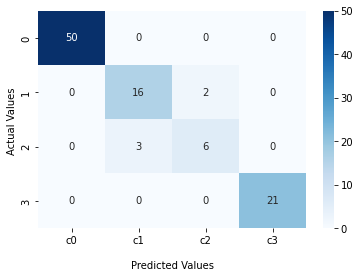

In [ ]:
import seaborn as sns

conf_mat=confusion_matrix(np.round(y_pred3,0),y_test)
conf_mat
ax= sns.heatmap(conf_mat , fmt="g",annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['c0','c1','c2','c3'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
lab.value_counts()

0    254
3    109
1     72
2     55
Name: Varices(1), dtype: int64

Random Forest Cross validation

In [ ]:
y_pred4=cross_val_predict(clf,sam,lab)

print(confusion_matrix(lab, y_pred4))
print(classification_report(lab, y_pred4))

[[254   0   0   0]
 [  0  66   6   0]
 [  0   6  47   2]
 [  0   2   0 107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       0.89      0.92      0.90        72
           2       0.89      0.85      0.87        55
           3       0.98      0.98      0.98       109

    accuracy                           0.97       490
   macro avg       0.94      0.94      0.94       490
weighted avg       0.97      0.97      0.97       490



In [ ]:
scores = cross_val_score(clf, sam , lab , cv=5)
scores

array([0.98979592, 0.95918367, 0.92857143, 0.96938776, 0.98979592])

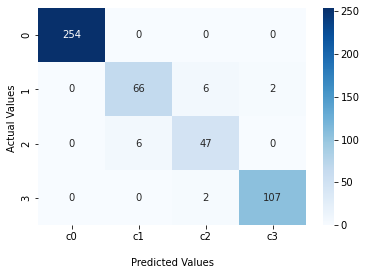

In [ ]:
import seaborn as sns

conf_mat=confusion_matrix(y_pred4,lab)
conf_mat
ax= sns.heatmap(conf_mat , fmt="g",annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['c0','c1','c2','c3'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Catboost Cross val

In [ ]:
#!pip install catboost
#xgb=XGBClassifier(colsample_bytree=0.8, learning_rate=0.4, max_depth=4)
from sklearn.model_selection import cross_val_predict
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=75, learning_rate=0.03, depth=2,loss_function='RMSE', l2_leaf_reg=0.2)


#cvs=cross_val_score(model,sam,lab,scoring='accuracy',cv=5)
#print('cross_val_scores=  ',cvs.mean())
y_pred =cross_val_predict(model,sam,lab,cv=5)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# prepare the cross-validation procedure
#from sklearn.utils import shuffle
#X_s, y_s = shuffle(sam, lab)
#cv = KFold(n_splits=10, random_state=1, shuffle=True)
#scoring = ['precision_macro', 'recall_macro', 'balanced_accuracy_score']

scores1 = cross_val_score(model, sam, lab)

scores1


0:	learn: 1.2073235	total: 680us	remaining: 50.4ms
1:	learn: 1.1758657	total: 1.94ms	remaining: 70.9ms
2:	learn: 1.1455566	total: 2.65ms	remaining: 63.6ms
3:	learn: 1.1190382	total: 3.45ms	remaining: 61.2ms
4:	learn: 1.0934993	total: 4.22ms	remaining: 59.1ms
5:	learn: 1.0618525	total: 4.91ms	remaining: 56.5ms
6:	learn: 1.0337638	total: 5.61ms	remaining: 54.5ms
7:	learn: 1.0071684	total: 6.3ms	remaining: 52.8ms
8:	learn: 0.9814391	total: 6.97ms	remaining: 51.1ms
9:	learn: 0.9590978	total: 7.65ms	remaining: 49.7ms
10:	learn: 0.9311355	total: 8.34ms	remaining: 48.5ms
11:	learn: 0.9074397	total: 9.05ms	remaining: 47.5ms
12:	learn: 0.8844909	total: 9.74ms	remaining: 46.4ms
13:	learn: 0.8642310	total: 10.4ms	remaining: 45.5ms
14:	learn: 0.8425994	total: 11.1ms	remaining: 44.4ms
15:	learn: 0.8232878	total: 11.8ms	remaining: 43.5ms
16:	learn: 0.8027852	total: 12.5ms	remaining: 42.6ms
17:	learn: 0.7830416	total: 13.2ms	remaining: 41.7ms
18:	learn: 0.7599207	total: 13.9ms	remaining: 40.8ms
19:	l

array([0.97994582, 0.96567075, 0.97942946, 0.97885006, 0.97763935])

In [ ]:
lab.value_counts()

0    254
3    109
1     72
2     55
Name: Varices(1), dtype: int64

In [ ]:
np.max(y_pred)

2.746980521559229

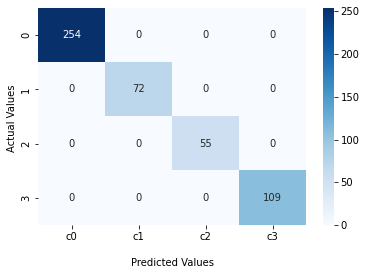

In [ ]:
conf_mat1=confusion_matrix(np.round(y_pred,0),lab)
conf_mat1
ax= sns.heatmap(conf_mat1 , fmt="g",annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['c0','c1','c2','c3','c4'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(model.feature_importances_.sort)

<built-in method sort of numpy.ndarray object at 0x7fa4e7519c90>


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(lab, np.round(y_pred,0), average='macro')))
print("Recall = {}".format(recall_score(lab, np.round(y_pred,0), average='macro')))
print("Accuracy = {}".format(accuracy_score(lab, np.round(y_pred,0))))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0


XGB Boost Cross val

In [ ]:
import xgboost as xgb

In [ ]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 4} 

steps = 50  # The number of training iterations

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 10)


In [ ]:
y_pred5 =cross_val_predict(xg_reg,sam,lab,cv=5)

scores5 = cross_val_score(xg_reg, sam, lab)

scores5

[04:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

array([0.91748122, 0.89292729, 0.92808926, 0.95077599, 0.94531634])

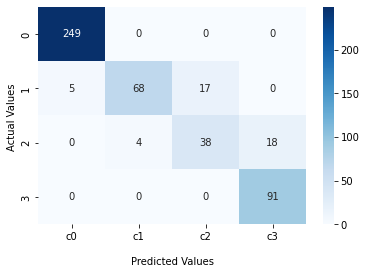

In [ ]:
conf_mat1=confusion_matrix(np.round(y_pred5,0),lab)
conf_mat1
ax= sns.heatmap(conf_mat1 , fmt="g",annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['c0','c1','c2','c3','c4'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()